# Drawing Web Tiles in Python with Matplotlib

If you are using python for spatial processing, it is sometimes useful to plot your data. In these cases, it may be helpful to also render a basemap to help locate the data. This notebook will show you how plot a web map tiles using cartopy and pyplot.

## Dependencies

You must have the [GEOS](https://trac.osgeo.org/geos/) and [PROJ](https://proj4.org/) libraries installed on your system libraries to use cartopy. For the full list of cartopy's dependencies, refer to https://scitools.org.uk/cartopy/docs/latest/installing.html

You should use cartopy >= v18.0, as older versions of cartopy do not work with PROJ 6.0.0 or the latest OSM tile server. As of writing, cartopy v18.0 is only available as a beta release. You can install it using:

In [ ]:
!pip install cython https://github.com/SciTools/cartopy/archive/v0.18.0b1.zip

## Selecting a Tileset

Cartopy supports many common tile servers, listed on https://github.com/SciTools/cartopy/releases

For this example, we will use OSM.

In [1]:
import cartopy.io.img_tiles as cimgt

request = cimgt.OSM()


### Projection

Can define your own https://github.com/SciTools/cartopy/releases or use one of the constant values.
We will use Google Mercator for this example

In [2]:
import cartopy.crs as ccrs

carto_proj = ccrs.GOOGLE_MERCATOR

## Rendering Tiles

To display the tileset, add a subplot to your plot, and add the tileset as an image. 

The projection parameter is added to pyplot by cartopy, and will be used to render the tileset and display the image.
The second parameter of add_image is the zoom level to use and will correlate directly to level of detail (and rendering time).

Since we are fetching tiles from an online service, this does require an internet connection.

<IPython.core.display.Javascript object>


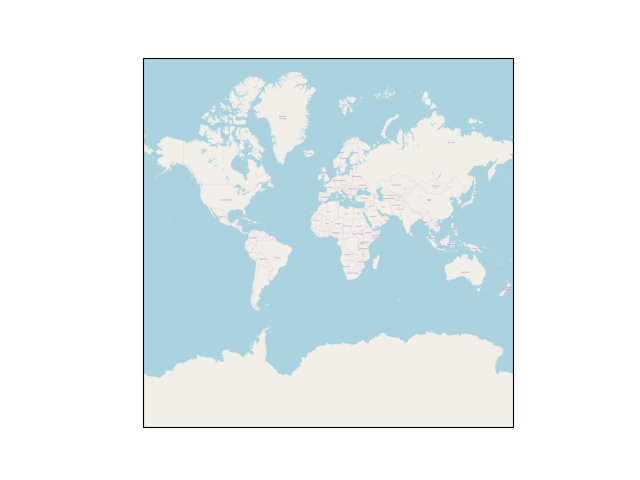

In [21]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=carto_proj)

# Add mapbox basemap via cartopy
request = cimgt.OSM()
tile_image = ax.add_image(request, 3)

To render a specific region, call `set_extent` with the geodetic (lat/lon) bounds of the region, before calling `add_image`. You'll also want to update your zoom level to something appropriate for those bounds.

<IPython.core.display.Javascript object>


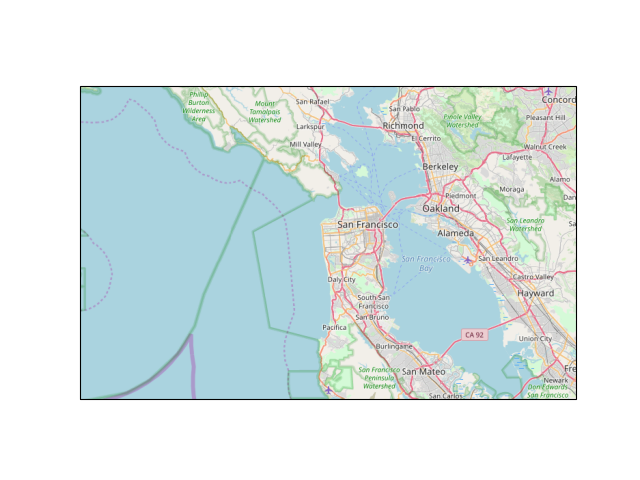

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=carto_proj)

ax.set_extent([-123.0, -122.0, 37.5, 38.0])
tile_image = ax.add_image(request, 10)